In [1]:
from anomalydetection.RDAE import RDAE
from anomalydetection.utils.ad import get_stats
from anomalydetection.utils.noise import add_noise
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
import tensorflow as tf
import numpy as np
import pickle as pl
import PIL.Image as Image
import ImShow as I
import pandas as pd
from matplotlib import pyplot as plt
import gc
from matplotlib.pyplot import figure

In [3]:
x = np.load('./data/data.npk', allow_pickle=True)
y = np.load('./data/y.npk', allow_pickle=True)
anomalies = (y != 4).astype(int)

CONTAMINATION = len(y[y!=4])/len(y)


In [30]:
ot = 30
it = 50 
bs = 150
lr = 0.001
drop = 0

lambdas = np.linspace(0.0001, 3.5, 20)
corruptions = [0, 50, 100, 150, 200, 250]

all_scores = []
LS = []
SS = []
for c in corruptions[1:]:
    seed = np.random.randint(1000)
    corrupted_x = add_noise(x, c, seed)

    scores = []
    LS1 = []
    SS1 = []
                                    
    for l in lambdas:
        print(f"Lambda: {l} Corruption: {c}")
        model = RDAE(encoder_layer_size=[784, 392, 196], decoder_layer_size=[392, 784], shrink='l1',
            activation_function='sigmoid', regularizer='', dropout=0.0, verbose=False, lambda_=l)
        model.compile(loss='BCE', optimizer=tf.keras.optimizers.Adam(lr))
        L, S = model.fit_transform(corrupted_x, batch_size=bs, inner_iteration=it, outer_iteration=ot)

        stats = get_stats(S,anomalies, CONTAMINATION)

        del model
        tf.keras.backend.clear_session()
        gc.collect()

        scores.append(stats['fscore'])
        LS1.append(L)
        SS1.append(S)
        print(f" fscore: {stats['fscore']}")
    all_scores.append(scores)
    LS.append(LS1)
    SS.append(SS1)

print(all_scores)
final_scores = np.array(all_scores)
LS_f = np.array(LS)
SS_f = np.array(SS)
with open('results/rdae3.npy', 'wb') as f:
    np.save(f, final_scores)
with open('results/rdae_L3.npy', 'wb') as f:
    np.save(f, LS_f)
with open('results/rdae_S3.npy', 'wb') as f:
    np.save(f, SS_f)

[8.00000000e-05 1.47444211e-01 2.94808421e-01 4.42172632e-01
 5.89536842e-01 7.36901053e-01 8.84265263e-01 1.03162947e+00
 1.17899368e+00 1.32635789e+00 1.47372211e+00 1.62108632e+00
 1.76845053e+00 1.91581474e+00 2.06317895e+00 2.21054316e+00
 2.35790737e+00 2.50527158e+00 2.65263579e+00 2.80000000e+00]
Lambda: 8e-05 Corruption: 50
 fscore: 0.5773584905660377
Lambda: 0.1474442105263158 Corruption: 50
 fscore: 0.5622641509433962
Lambda: 0.2948084210526316 Corruption: 50
 fscore: 0.5207547169811321
Lambda: 0.44217263157894743 Corruption: 50
 fscore: 0.5245283018867924
Lambda: 0.5895368421052631 Corruption: 50
 fscore: 0.5245283018867924
Lambda: 0.7369010526315789 Corruption: 50
 fscore: 0.4566037735849056
Lambda: 0.8842652631578948 Corruption: 50
 fscore: 0.4867924528301887
Lambda: 1.0316294736842107 Corruption: 50
 fscore: 0.47924528301886793
Lambda: 1.1789936842105264 Corruption: 50
 fscore: 0.47924528301886793
Lambda: 1.3263578947368422 Corruption: 50
 fscore: 0.47924528301886793
Lam

KeyboardInterrupt: 

In [ ]:
final_scores = results/

In [22]:
ot = 20
it = 25
bs = 100
lr = 0.001
drop = 0

#lambdas = sorted([0.001, 0.01, 0.1, 0.25, 0.5, 1, 10, 25, 50])
lambdas = sorted([0.00001, 0.00005, 0.0001])
corruptions = [0, 50, 100, 150, 200, 250]

all_scores2 = []
LS2 = []
SS2 = []
for c in corruptions:
    seed = np.random.randint(1000)
    corrupted_x = add_noise(x, c, seed)

    scores = []
    LS1 = []
    SS1 = []
    for l in lambdas:
        print(f"Lambda: {l} Corruption: {c}")
        model = RDAE(encoder_layer_size=[784, 392, 196], decoder_layer_size=[392, 784], shrink='l1',
            activation_function='sigmoid', regularizer='', dropout=drop, verbose=False, lambda_=l)
        model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(lr))
        L, S = model.fit_transform(corrupted_x, batch_size=bs, inner_iteration=it, outer_iteration=ot)

        stats = get_stats(S,anomalies, CONTAMINATION)

        del model
        tf.keras.backend.clear_session()
        gc.collect()

        scores.append(stats['fscore'])
        LS1.append(L)
        SS1.append(S)
        print(f" fscore: {stats['fscore']}")
    all_scores2.append(scores)
    LS2.append(LS1)
    SS2.append(SS1)

"""print(all_scores)
final_scores = np.array(all_scores)
LS_f = np.array(LS)
SS_f = np.array(SS)
with open('results/rdae3.npy', 'wb') as f:
    np.save(f, final_scores)
with open('results/rdae_L3.npy', 'wb') as f:
    np.save(f, LS_f)
with open('results/rdae_S3.npy', 'wb') as f:
    np.save(f, SS_f)"""

Lambda: 1e-05 Corruption: 0
 fscore: 0.6452830188679245
Lambda: 5e-05 Corruption: 0
 fscore: 0.6490566037735849
Lambda: 0.0001 Corruption: 0
 fscore: 0.6415094339622641
Lambda: 1e-05 Corruption: 50
 fscore: 0.6037735849056604
Lambda: 5e-05 Corruption: 50
 fscore: 0.5886792452830188
Lambda: 0.0001 Corruption: 50
 fscore: 0.5849056603773585
Lambda: 1e-05 Corruption: 100
 fscore: 0.5056603773584906
Lambda: 5e-05 Corruption: 100
 fscore: 0.5018867924528302
Lambda: 0.0001 Corruption: 100
 fscore: 0.49433962264150944
Lambda: 1e-05 Corruption: 150
 fscore: 0.47547169811320755
Lambda: 5e-05 Corruption: 150
 fscore: 0.47924528301886793
Lambda: 0.0001 Corruption: 150
 fscore: 0.4867924528301887
Lambda: 1e-05 Corruption: 200
 fscore: 0.3849056603773585
Lambda: 5e-05 Corruption: 200
 fscore: 0.3886792452830189
Lambda: 0.0001 Corruption: 200
 fscore: 0.39245283018867927
Lambda: 1e-05 Corruption: 250
 fscore: 0.42641509433962266
Lambda: 5e-05 Corruption: 250
 fscore: 0.43396226415094347
Lambda: 0.00

"print(all_scores)\nfinal_scores = np.array(all_scores)\nLS_f = np.array(LS)\nSS_f = np.array(SS)\nwith open('results/rdae3.npy', 'wb') as f:\n    np.save(f, final_scores)\nwith open('results/rdae_L3.npy', 'wb') as f:\n    np.save(f, LS_f)\nwith open('results/rdae_S3.npy', 'wb') as f:\n    np.save(f, SS_f)"

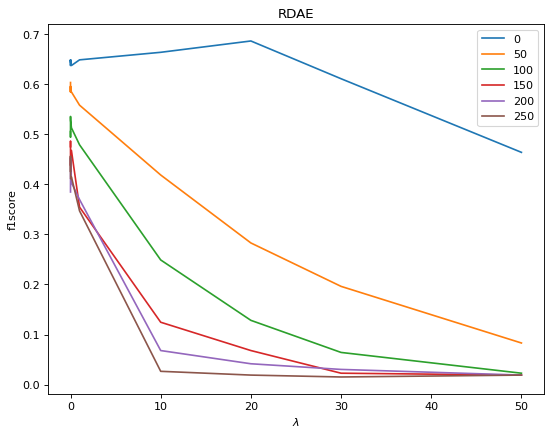

In [40]:
figure(figsize=(8, 6), dpi=80)

for i in range(len(corruptions)):
    plt.plot(lambdas, np.append(final_scores2[i], final_scores[i]), label=corruptions[i])
plt.title('RDAE')
plt.legend()
plt.ylabel('f1score')
plt.xlabel('$\lambda$')
plt.show()

In [41]:
cv  = []
for i in range(len(corruptions)):
    cv.append(np.append(final_scores2[i], final_scores[i]))

In [46]:
cv.max(axis=1)

array([0.68679245, 0.60377358, 0.53584906, 0.48679245, 0.45283019,
       0.45660377])